In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/waves_metrics.csv'
data = pd.read_csv(file_path)

# 1. Checking for Missing Values
missing_values = data.isnull().sum()
print("Missing Values Count per Column:")
print(missing_values)

# 2. Checking for Duplicate Records
duplicate_records = data.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicate_records}")

# 3. Checking for Irrelevant Columns
# Irrelevant columns can be columns that do not provide meaningful information
irrelevant_columns = [col for col in data.columns if 'Unnamed' in col]
print(f"\nIrrelevant columns found: {irrelevant_columns}")

# If irrelevant columns are found, they can be dropped like this:
data.drop(columns=irrelevant_columns, inplace=True)

# 4. Feature Engineering
# Creating a lag feature for Volatility (previous time step value)
data['Volatility_lag1'] = data['Volatility'].shift(1)

# Creating a 5-period moving average for FastMomentum
data['FastMomentum_MA'] = data['FastMomentum'].rolling(window=5).mean()

print("\nFeature Engineering: Added 'Volatility_lag1' and 'FastMomentum_MA'")

# 5. Data Type Conversion
# Converting the 'Ts' column from timestamp to datetime
print("\nData types before conversion:")
print(data.dtypes)

# If 'Ts' column is a timestamp, convert it to a readable datetime format
data['Ts'] = pd.to_datetime(data['Ts'], unit='s')

print("\nData types after conversion:")
print(data.dtypes)

# Final check: display a summary of missing values, duplicate records, and data types after processing
print("\nFinal summary after cleaning and processing:")
print("Missing Values:")
print(data.isnull().sum())

print(f"\nDuplicate Records: {data.duplicated().sum()}")

print("\nData Types:")
print(data.dtypes)

Missing Values Count per Column:
Unnamed: 0        0
Ts                0
HighMomentum      0
LowMomentum       0
FastMomentum      0
Volatility        0
NormClose         0
NormVolume        0
Delta           118
HighAlpha       119
HighBetta       121
LowAlpha        118
LowBetta        119
LowGamma        121
Meditation      121
MidGamma        120
Theta           119
dtype: int64

Number of duplicate records: 0

Irrelevant columns found: ['Unnamed: 0']

Feature Engineering: Added 'Volatility_lag1' and 'FastMomentum_MA'

Data types before conversion:
Ts                   int64
HighMomentum       float64
LowMomentum        float64
FastMomentum       float64
Volatility         float64
NormClose          float64
NormVolume         float64
Delta              float64
HighAlpha          float64
HighBetta          float64
LowAlpha           float64
LowBetta           float64
LowGamma           float64
Meditation         float64
MidGamma           float64
Theta              float64
Volatilit

In [ ]:
# Imputing missing values with the mean of each column
data['Delta'].fillna(data['Delta'].mean(), inplace=True)
data['HighAlpha'].fillna(data['HighAlpha'].mean(), inplace=True)
data['HighBetta'].fillna(data['HighBetta'].mean(), inplace=True)
data['LowAlpha'].fillna(data['LowAlpha'].mean(), inplace=True)
data['LowBetta'].fillna(data['LowBetta'].mean(), inplace=True)
data['LowGamma'].fillna(data['LowGamma'].mean(), inplace=True)
data['Meditation'].fillna(data['Meditation'].mean(), inplace=True)
data['MidGamma'].fillna(data['MidGamma'].mean(), inplace=True)
data['Theta'].fillna(data['Theta'].mean(), inplace=True)

# Imputing missing values for the new engineered features
data['Volatility_lag1'].fillna(data['Volatility_lag1'].mean(), inplace=True)
data['FastMomentum_MA'].fillna(data['FastMomentum_MA'].mean(), inplace=True)

# Final check for missing values
print("Missing Values After Imputation:")
print(data.isnull().sum())

Missing Values After Imputation:
Ts                 0
HighMomentum       0
LowMomentum        0
FastMomentum       0
Volatility         0
NormClose          0
NormVolume         0
Delta              0
HighAlpha          0
HighBetta          0
LowAlpha           0
LowBetta           0
LowGamma           0
Meditation         0
MidGamma           0
Theta              0
Volatility_lag1    0
FastMomentum_MA    0
dtype: int64


In [ ]:
import pandas as pd
from scipy import stats

# Assuming data is already loaded

# 1. Time-Based Features
data['DayOfWeek'] = data['Ts'].dt.dayofweek
data['Hour'] = data['Ts'].dt.hour
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# 2. Momentum and Volatility Derivatives
data['Volatility_ROC'] = data['Volatility'].pct_change().fillna(0)  # Prevent NA by filling with 0
data['MomentumDiff'] = data['HighMomentum'] - data['LowMomentum']

# 3. Interaction Features
data['Volatility_Delta'] = data['Volatility'] * data['Delta']
data['Momentum_HighAlpha'] = data['HighMomentum'] * data['HighAlpha']

# 4. Rolling Statistics (filling NAs at the beginning)
data['Volatility_MA'] = data['Volatility'].rolling(window=5, min_periods=1).mean()
data['Volatility_Std'] = data['Volatility'].rolling(window=5, min_periods=1).std()

# 5. Brainwave Power Ratios
data['Alpha_Beta_Ratio'] = data['HighAlpha'] / (data['HighBetta'] + 1e-6)
data['Theta_Beta_Ratio'] = data['Theta'] / (data['HighBetta'] + 1e-6)

# 6. Z-Score Normalization
data['Volatility_Z'] = stats.zscore(data['Volatility'])
data['Delta_Z'] = stats.zscore(data['Delta'])

# Display the updated data
print("Feature engineering complete, showing first few rows:")
print(data.head())

Feature engineering complete, showing first few rows:
                   Ts  HighMomentum  LowMomentum  FastMomentum  Volatility  \
0 2022-01-24 05:38:30      1.006257     0.989536      0.996950    0.000647   
1 2022-01-24 05:38:31      1.006257     0.989536      0.996950    0.000647   
2 2022-01-24 05:38:32      1.006257     0.989536      0.997247    0.000646   
3 2022-01-24 05:38:33      1.006257     0.989536      0.997431    0.000644   
4 2022-01-24 05:38:34      1.006257     0.989536      0.997357    0.000642   

   NormClose  NormVolume     Delta  HighAlpha  HighBetta  ...  Volatility_ROC  \
0   0.601703    0.025982  684087.0    30642.0     5902.0  ...        0.000000   
1   0.601703    0.025982    8800.0     6291.0     7942.0  ...        0.000000   
2   0.570665    0.076457   38743.0    14111.0     7549.0  ...       -0.002072   
3   0.600072    0.052782   56506.0     2924.0     2753.0  ...       -0.002400   
4   0.588647    0.133676    7223.0     4052.0     3349.0  ...       -0.0

Basic EDA Structure

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display basic information about the dataset
print("Basic Information:")
data.info()

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())

# Checking for missing values after feature engineering
print("\nMissing Values Count per Column:")
print(data.isnull().sum())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19350 entries, 0 to 19349
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ts                  19350 non-null  datetime64[ns]
 1   HighMomentum        19350 non-null  float64       
 2   LowMomentum         19350 non-null  float64       
 3   FastMomentum        19350 non-null  float64       
 4   Volatility          19350 non-null  float64       
 5   NormClose           19350 non-null  float64       
 6   NormVolume          19350 non-null  float64       
 7   Delta               19350 non-null  float64       
 8   HighAlpha           19350 non-null  float64       
 9   HighBetta           19350 non-null  float64       
 10  LowAlpha            19350 non-null  float64       
 11  LowBetta            19350 non-null  float64       
 12  LowGamma            19350 non-null  float64       
 13  Meditation          19350 n

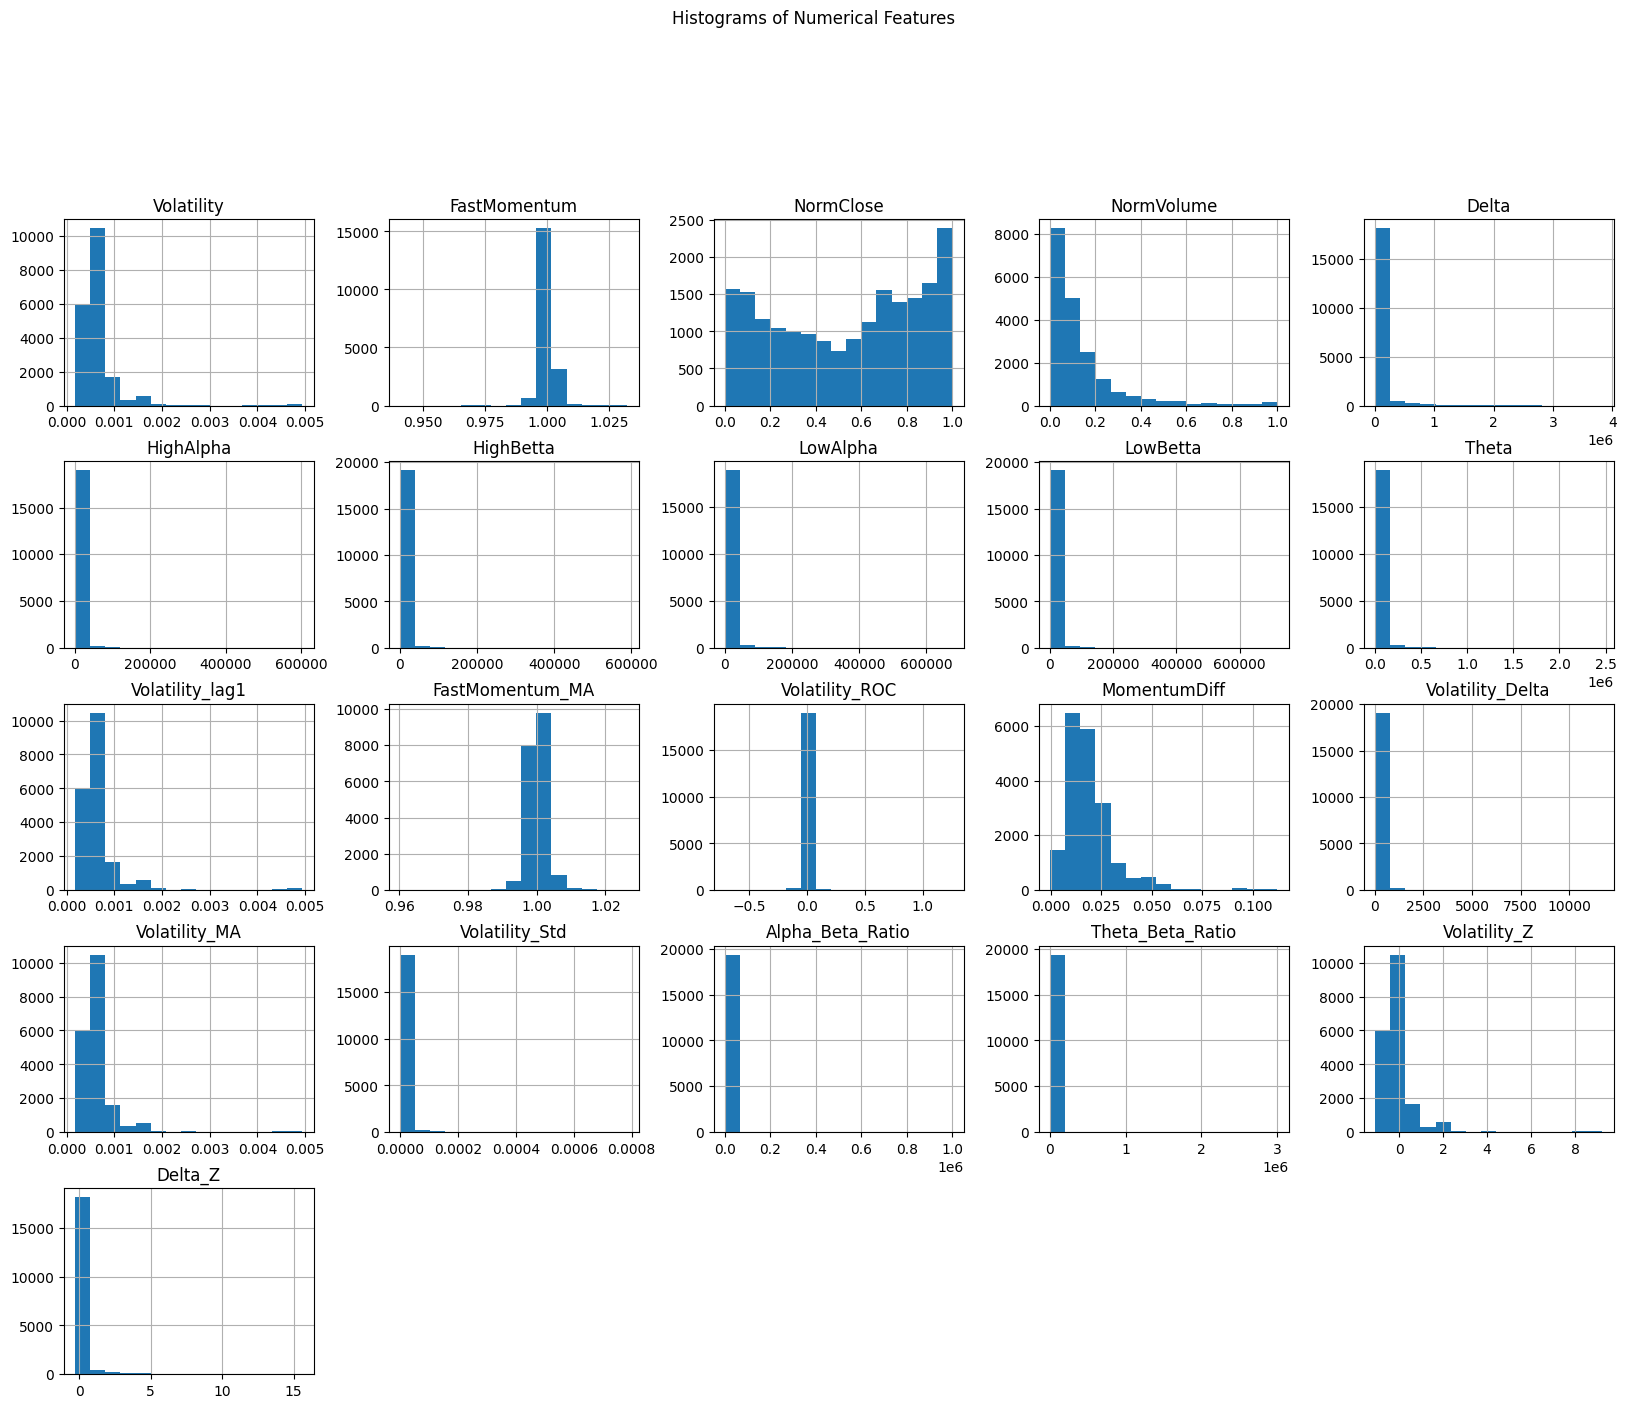

In [ ]:
# 2. Univariate Analysis - Distribution of Features
# Histograms for numerical columns
numerical_columns = ['Volatility', 'FastMomentum', 'NormClose', 'NormVolume',
                     'Delta', 'HighAlpha', 'HighBetta', 'LowAlpha', 'LowBetta',
                     'Theta', 'Volatility_lag1', 'FastMomentum_MA', 'Volatility_ROC',
                     'MomentumDiff', 'Volatility_Delta', 'Volatility_MA', 'Volatility_Std',
                     'Alpha_Beta_Ratio', 'Theta_Beta_Ratio', 'Volatility_Z', 'Delta_Z']

# Plot histograms
data[numerical_columns].hist(bins=15, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

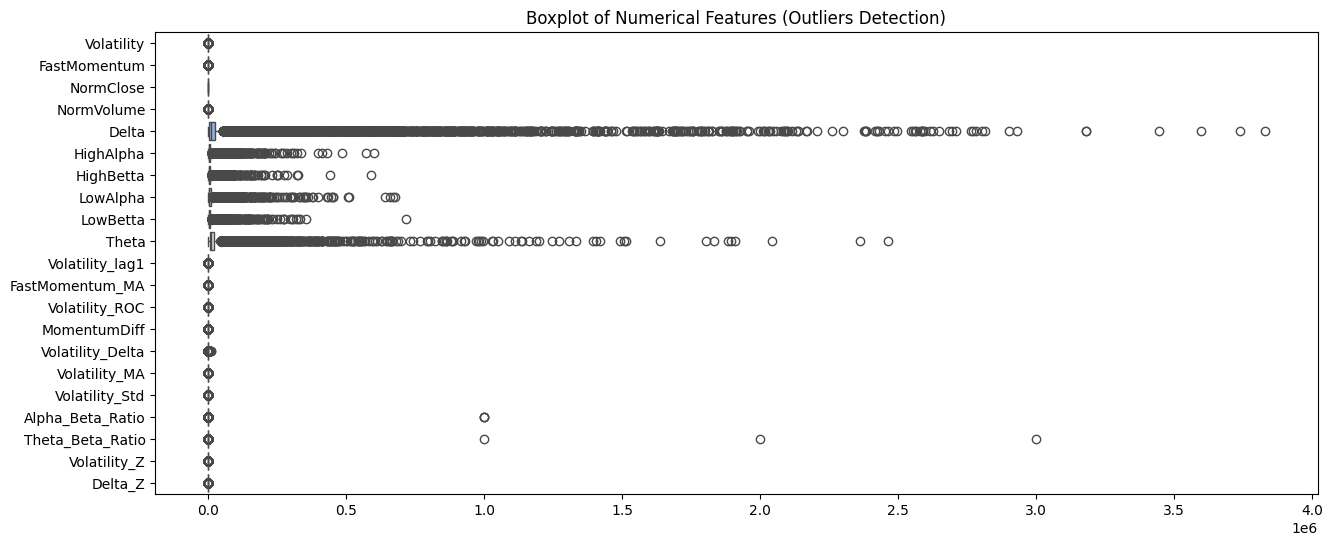

In [ ]:
# 3. Univariate Analysis - Boxplots to Detect Outliers
# Plot boxplots for the relevant columns
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[numerical_columns], orient="h", palette="coolwarm")
plt.title('Boxplot of Numerical Features (Outliers Detection)')
plt.show()

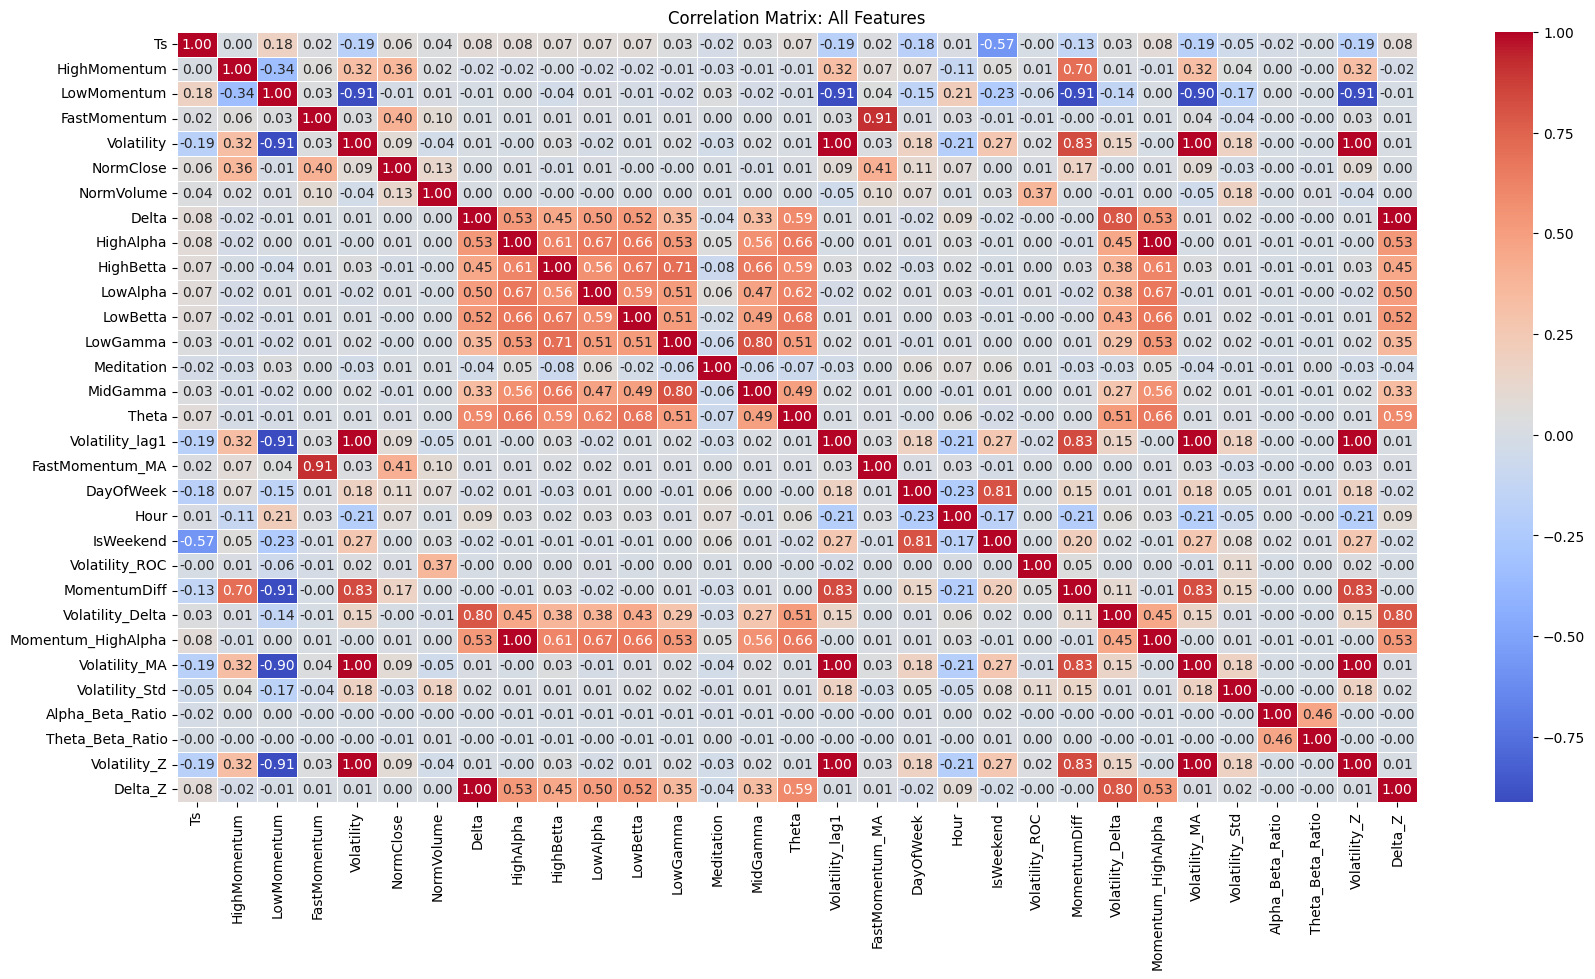

In [ ]:
# 4. Correlation Analysis - Heatmap of Correlations Between Features
# Correlation Matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: All Features')
plt.show()

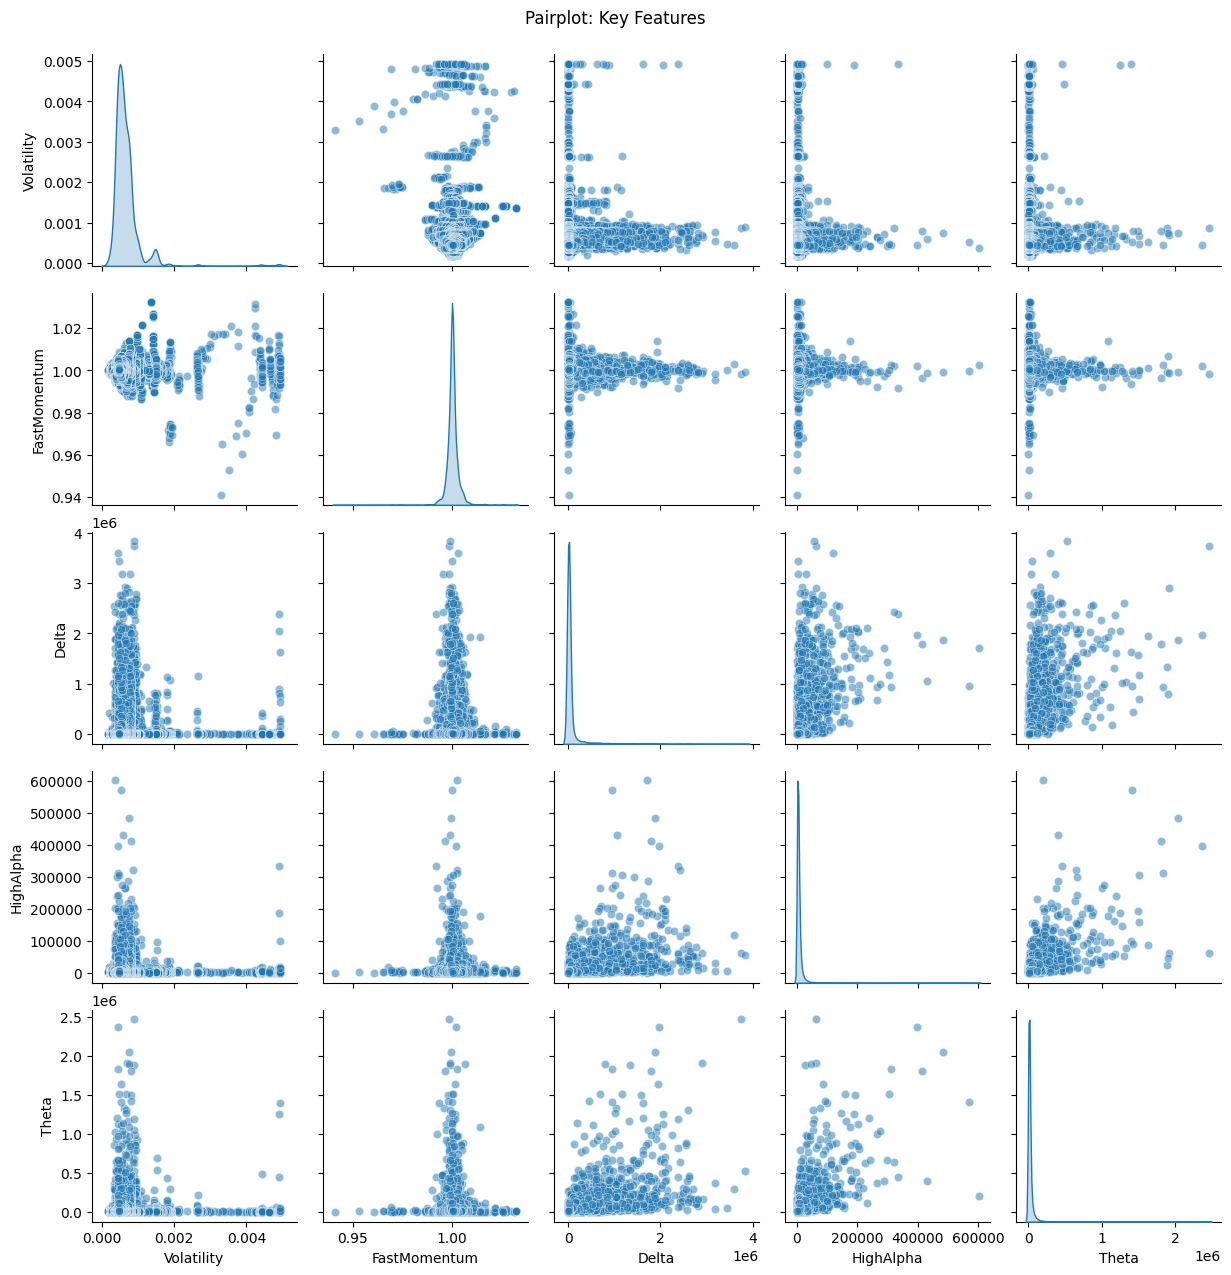

In [ ]:
# 5. Pairplot for Key Features
# Selecting a subset of features for pairplot (for simplicity)
subset_columns = ['Volatility', 'FastMomentum', 'Delta', 'HighAlpha', 'Theta']

# Pairplot of selected features
sns.pairplot(data[subset_columns], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot: Key Features', y=1.02)
plt.show()

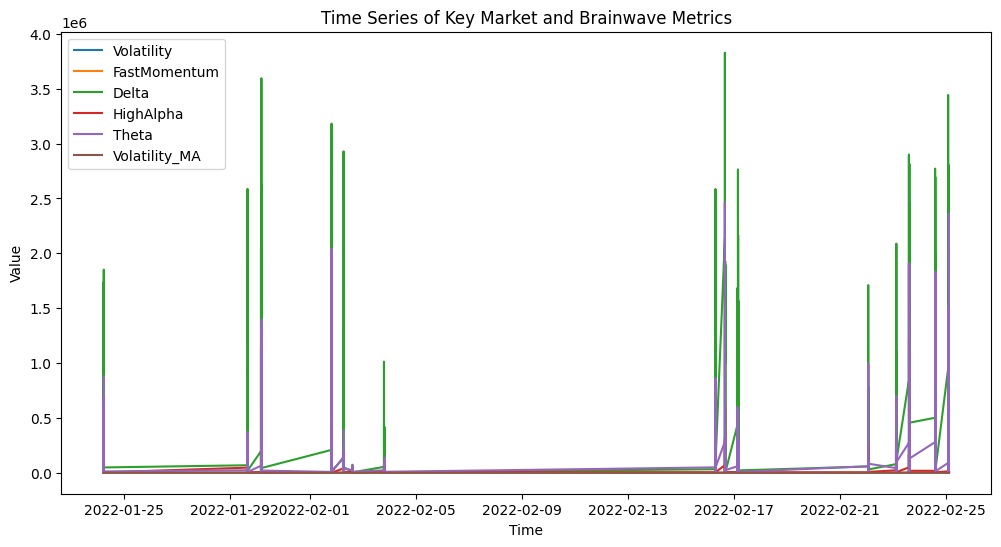

In [ ]:
# 6. Time Series Plot of Key Features Over Time
# Time series plot for some of the market and brainwave metrics
time_columns = ['Volatility', 'FastMomentum', 'Delta', 'HighAlpha', 'Theta', 'Volatility_MA']

plt.figure(figsize=(12, 6))
for column in time_columns:
    plt.plot(data['Ts'], data[column], label=column)

plt.title('Time Series of Key Market and Brainwave Metrics')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

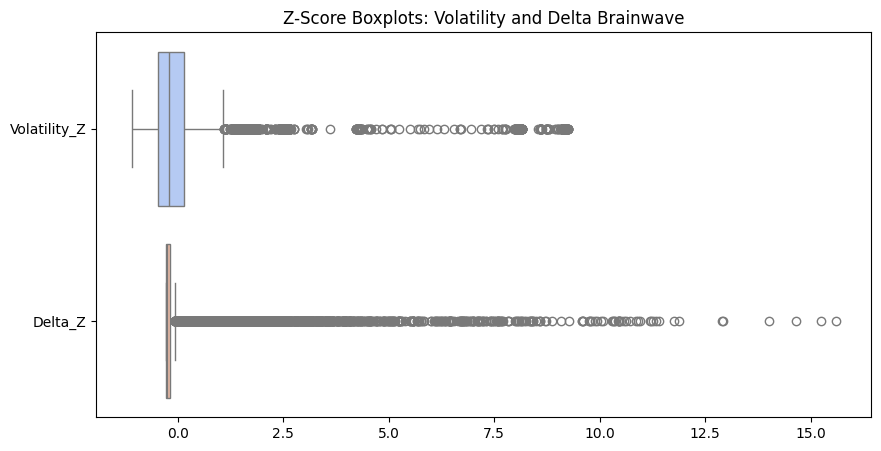

In [ ]:
# 7. Z-Score Boxplots for Outlier Detection
# Z-Score Boxplot for features
z_score_columns = ['Volatility_Z', 'Delta_Z']

plt.figure(figsize=(10, 5))
sns.boxplot(data=data[z_score_columns], orient="h", palette="coolwarm")
plt.title('Z-Score Boxplots: Volatility and Delta Brainwave')
plt.show()

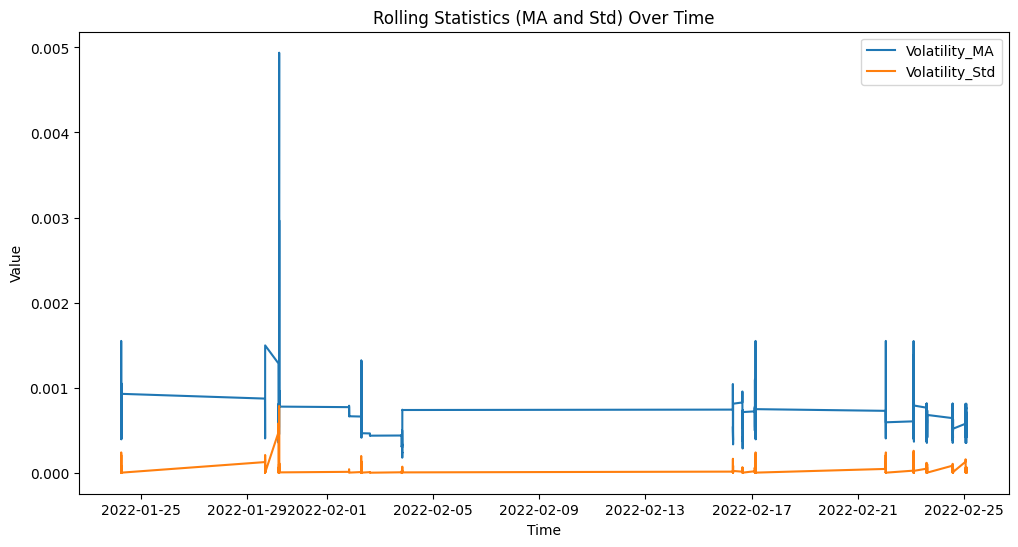

In [ ]:
# 8. Rolling Statistics (Moving Averages and Standard Deviations)
# Plot of rolling averages and standard deviation over time
rolling_columns = ['Volatility_MA', 'Volatility_Std']

plt.figure(figsize=(12, 6))
for column in rolling_columns:
    plt.plot(data['Ts'], data[column], label=column)

plt.title('Rolling Statistics (MA and Std) Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

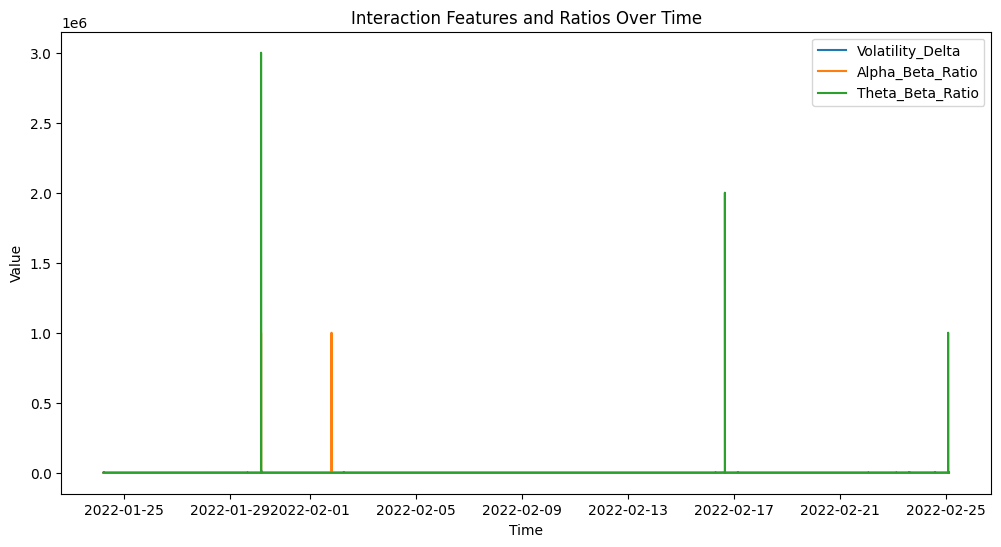

In [ ]:
# 9. Feature Engineering: Interaction and Ratios Over Time
# Plot of feature engineering results (Volatility_Delta, Alpha_Beta_Ratio, Theta_Beta_Ratio)
interaction_columns = ['Volatility_Delta', 'Alpha_Beta_Ratio', 'Theta_Beta_Ratio']

plt.figure(figsize=(12, 6))
for column in interaction_columns:
    plt.plot(data['Ts'], data[column], label=column)

plt.title('Interaction Features and Ratios Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<ipython-input-15-942e1d10d6cc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=data, palette='Set2')


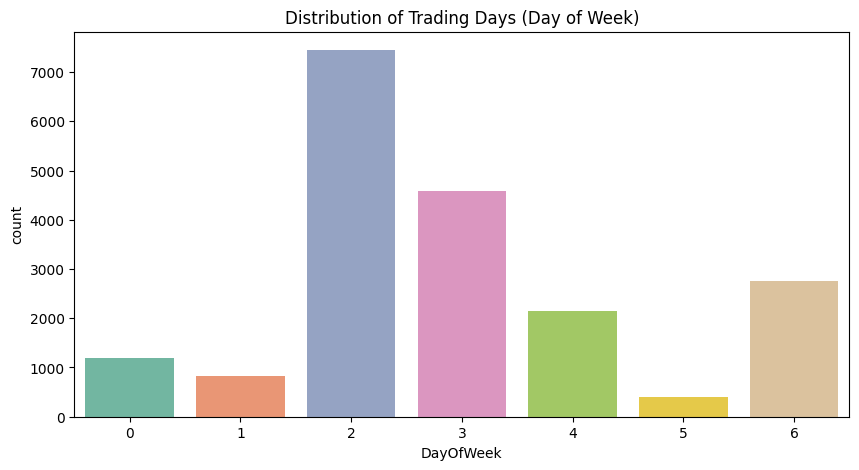

<ipython-input-15-942e1d10d6cc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsWeekend', data=data, palette='Set2')


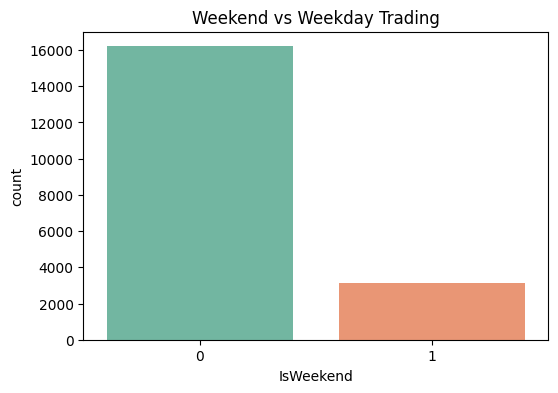

In [ ]:
# 10. Categorical Feature Analysis (Day of Week and Weekend Indicator)
# Plot for DayOfWeek distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='DayOfWeek', data=data, palette='Set2')
plt.title('Distribution of Trading Days (Day of Week)')
plt.show()

# Plot for Weekend/Weekday Indicator
plt.figure(figsize=(6, 4))
sns.countplot(x='IsWeekend', data=data, palette='Set2')
plt.title('Weekend vs Weekday Trading')
plt.show()

1. Investigate the Impact of Market Conditions on Cognitive States

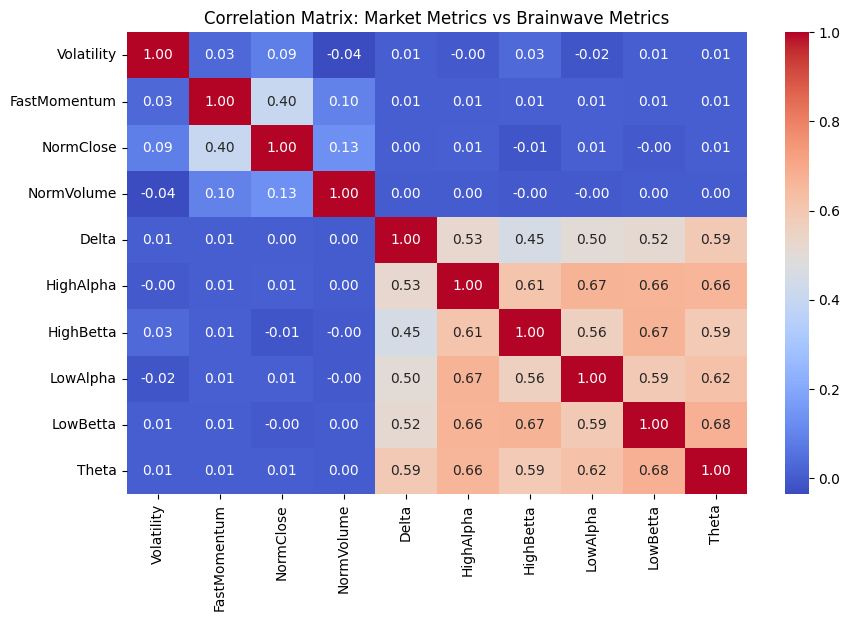

In [ ]:
# Correlation analysis between market metrics and brainwave metrics
market_columns = ['Volatility', 'FastMomentum', 'NormClose', 'NormVolume']
brainwave_columns = ['Delta', 'HighAlpha', 'HighBetta', 'LowAlpha', 'LowBetta', 'Theta']

# Calculate and plot correlation matrix
corr_matrix = data[market_columns + brainwave_columns].corr()

# Plot heatmap for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Market Metrics vs Brainwave Metrics')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define independent (market metrics) and dependent (brainwave metrics) variables
X = data[market_columns]
y = data[brainwave_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: {r2}")

Linear Regression - Mean Squared Error: 10204252592.849815
Linear Regression - R-squared: -0.0010542740990417039


In [ ]:
# Check dimensions of X_train and X_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# If X_train or X_test has 3 dimensions or more, reshape them to 2D
if len(X_train.shape) == 3:
    X_train = X_train.reshape(X_train.shape[0], -1)  # Reshape to (n_samples, n_features)
if len(X_test.shape) == 3:
    X_test = X_test.reshape(X_test.shape[0], -1)  # Reshape to (n_samples, n_features)

# After reshaping, check again
print("X_train reshaped:", X_train.shape)
print("X_test reshaped:", X_test.shape)

# Now apply MultiOutput Ridge Regression (if using multiple targets)
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

ridge_model = MultiOutputRegressor(Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression (MultiOutput) - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression (MultiOutput) - R-squared: {r2_ridge}")


X_train shape: (15472, 10, 6)
X_test shape: (3868, 10, 6)
X_train reshaped: (15472, 60)
X_test reshaped: (3868, 60)
Ridge Regression (MultiOutput) - Mean Squared Error: 0.0012153770253805734
Ridge Regression (MultiOutput) - R-squared: -1.137528764119586


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ensure y_train and y_test are 2D arrays
if len(y_train.shape) == 1:
    y_train = y_train.reshape(-1, 1)
if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)

# Apply Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)  # You can tune alpha for better performance
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R-squared: {r2_lasso}")


Lasso Regression - Mean Squared Error: 0.0012413065438065436
Lasso Regression - R-squared: -1.183131972274623


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Check dimensions and ensure y_train and y_test are 2D arrays
if len(y_train.shape) == 1:
    y_train = y_train.reshape(-1, 1)
if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)

# Apply Elastic Net Regression
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio for tuning
elasticnet_model.fit(X_train, y_train)

# Make predictions
y_pred_elasticnet = elasticnet_model.predict(X_test)

# Evaluate model performance
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print(f"Elastic Net - Mean Squared Error: {mse_elasticnet}")
print(f"Elastic Net - R-squared: {r2_elasticnet}")


Elastic Net - Mean Squared Error: 0.0012413065438065436
Elastic Net - R-squared: -1.183131972274623


2. Develop Predictive Models for Market Volatility

2.1 Random Forest and Gradient Boosting

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Define features (brainwave data) and target (volatility)
X = data[brainwave_columns]
y = data['Volatility']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, MAE: {mae_rf}")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Gradient Boosting - RMSE: {rmse_gb}, MAE: {mae_gb}")

Random Forest - RMSE: 0.0004504392216773931, MAE: 0.0002461721570372492
Gradient Boosting - RMSE: 0.000440760765514461, MAE: 0.00023027505169169343


In [ ]:
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}")

XGBoost - RMSE: 0.04695599016050785, MAE: 0.03431530595537967


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 0.0112
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0116
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0112
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0111
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0110
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0116
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0115
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0111
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0117
Epoch 10/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0115
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
LSTM - RMSE: 0.00016111800771627808, MAE: 0.0001339047165528795


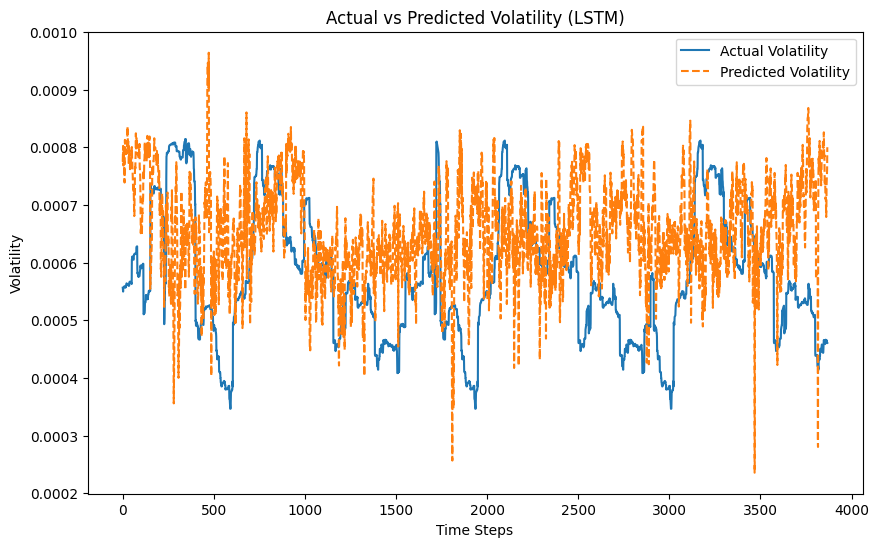

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[brainwave_columns + ['Volatility']])

# Prepare the data for LSTM (using time steps)
X = []
y = []
time_steps = 10
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, :-1])  # All brainwave columns
    y.append(scaled_data[i, -1])  # Volatility column

X, y = np.array(X), np.array(y)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
y_pred_lstm = model.predict(X_test)

# Rescale the predictions and actual values back to original scale
y_pred_lstm_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((y_pred_lstm.shape[0], len(brainwave_columns))), y_pred_lstm], axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], len(brainwave_columns))), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Evaluate the model
rmse_lstm = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_lstm_rescaled))
mae_lstm = mean_absolute_error(y_test_rescaled, y_pred_lstm_rescaled)
print(f"LSTM - RMSE: {rmse_lstm}, MAE: {mae_lstm}")

# Visualization: Plot actual vs predicted volatility
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual Volatility")
plt.plot(y_pred_lstm_rescaled, label="Predicted Volatility", linestyle='--')
plt.title("Actual vs Predicted Volatility (LSTM)")
plt.xlabel("Time Steps")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prepare the data for GRU (the same way as LSTM)
X = []
y = []
time_steps = 10
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, :-1])  # All brainwave columns
    y.append(scaled_data[i, -1])  # Volatility column

X, y = np.array(X), np.array(y)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(GRU(units=50))
gru_model.add(Dense(1))

# Compile and train the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions and evaluate GRU
y_pred_gru = gru_model.predict(X_test)
rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
mae_gru = mean_absolute_error(y_test, y_pred_gru)
print(f"GRU - RMSE: {rmse_gru}, MAE: {mae_gru}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - loss: 0.0124
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0115
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0113
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0108
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0109
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0115
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0115
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0117
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0121
Epoch 10/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0109
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
GRU - RMSE: 0.04082077021783072, MAE: 0.034878744296514205


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.0129
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0121
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0112
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0116
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0114
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0113
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0118
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0118
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0107
Epoch 10/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0108
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
GRU - RMSE: 0.00018076223573470942, MAE: 0.00015616143948599614


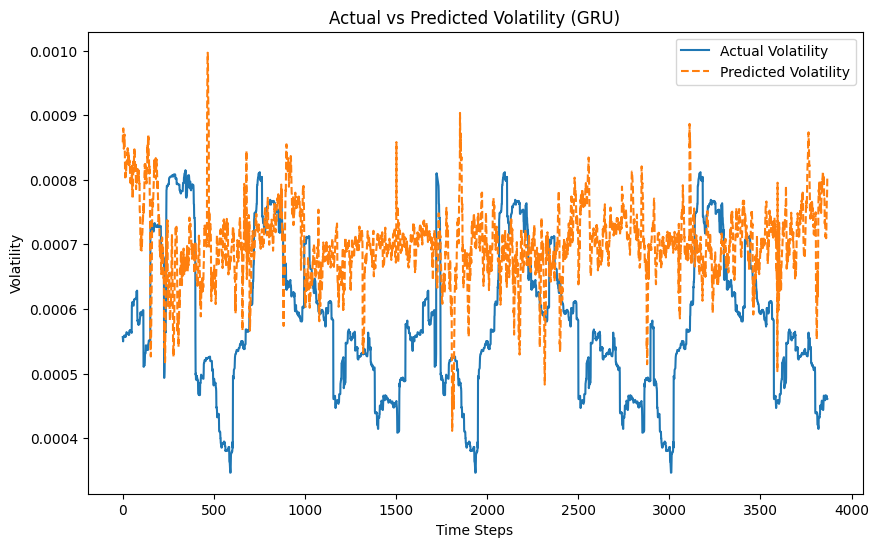

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[brainwave_columns + ['Volatility']])

# Prepare the data for GRU (using time steps)
X = []
y = []
time_steps = 10
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, :-1])  # All brainwave columns
    y.append(scaled_data[i, -1])  # Volatility column

X, y = np.array(X), np.array(y)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(GRU(units=50))
gru_model.add(Dense(1))

# Compile and train the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')
history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
y_pred_gru = gru_model.predict(X_test)

# Rescale the predictions and actual values back to original scale
y_pred_gru_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((y_pred_gru.shape[0], len(brainwave_columns))), y_pred_gru], axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], len(brainwave_columns))), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Evaluate the model
rmse_gru = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_gru_rescaled))
mae_gru = mean_absolute_error(y_test_rescaled, y_pred_gru_rescaled)
print(f"GRU - RMSE: {rmse_gru}, MAE: {mae_gru}")

# Visualization: Plot actual vs predicted volatility
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual Volatility")
plt.plot(y_pred_gru_rescaled, label="Predicted Volatility", linestyle='--')
plt.title("Actual vs Predicted Volatility (GRU)")
plt.xlabel("Time Steps")
plt.ylabel("Volatility")
plt.legend()
plt.show()

3. Identify Clusters of Trading Periods

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Build SimpleRNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dense(1))

# Compile and train the SimpleRNN model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions and evaluate SimpleRNN
y_pred_rnn = rnn_model.predict(X_test)
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
print(f"SimpleRNN - RMSE: {rmse_rnn}, MAE: {mae_rnn}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - loss: 0.0160
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0115
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0116
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0120
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0117
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0115
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0108
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0120
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0109
Epoch 10/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0123
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
SimpleRNN - RMSE: 0.036156790674439644, MAE: 0.03107731846052127


3.1 K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


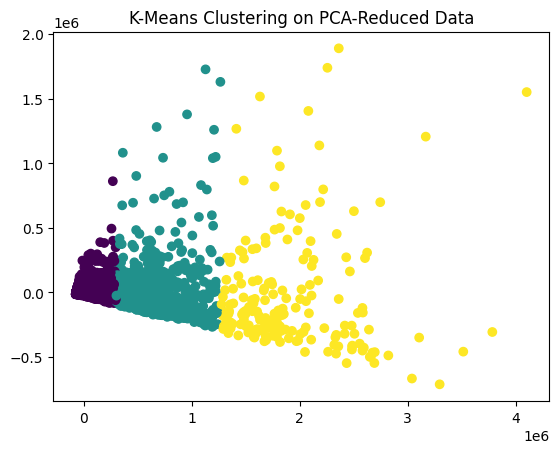

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[market_columns + brainwave_columns])

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(pca_result)

# Visualize the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.show()

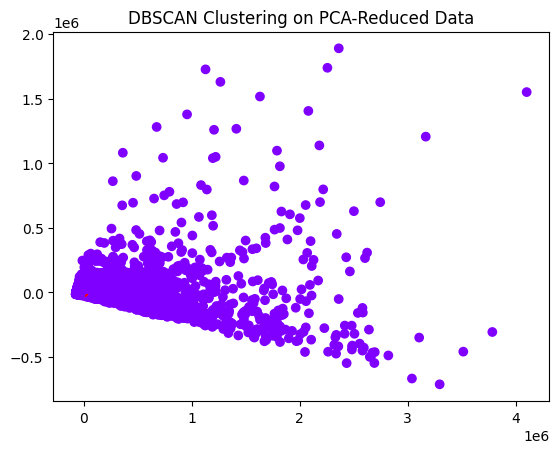

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(pca_result)

# Visualize DBSCAN clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['DBSCAN_Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.show()

4. Detect Anomalies in Market and Cognitive Metrics

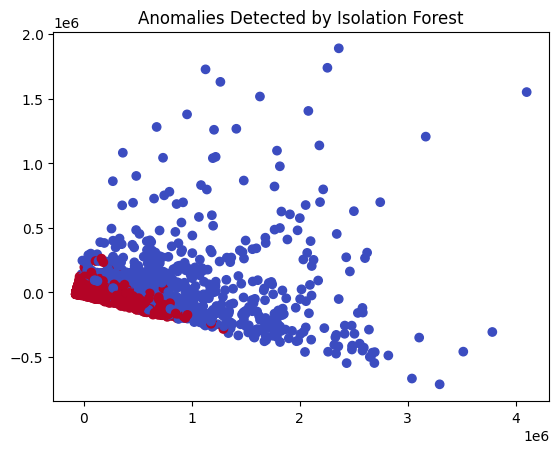

In [ ]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly_IsolationForest'] = iso_forest.fit_predict(data[market_columns + brainwave_columns])

# Plot anomalies
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Anomaly_IsolationForest'], cmap='coolwarm')
plt.title('Anomalies Detected by Isolation Forest')
plt.show()


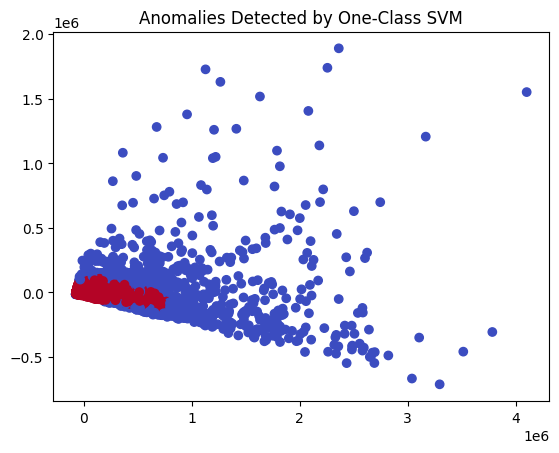

In [ ]:
from sklearn.svm import OneClassSVM

# Apply One-Class SVM
svm = OneClassSVM(nu=0.05)
data['Anomaly_OneClassSVM'] = svm.fit_predict(data[market_columns + brainwave_columns])

# Plot anomalies
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Anomaly_OneClassSVM'], cmap='coolwarm')
plt.title('Anomalies Detected by One-Class SVM')
plt.show()